# Titanic Survivial Data Analysis

#### 📌 Project Overview


The objective of this project is to perform Data Cleaning and Exploratory Data Analysis (EDA) on the iconic Titanic dataset. The primary goal is to analyze survival patterns and identify which factors—such as gender, age, and socio-economic class—influenced a passenger's chances of surviving the shipwreck.

#### 📊 Dataset Description

The analysis is conducted using the Titanic Dataset sourced from Kaggle. This dataset contains detailed passenger information, including demographic details (age, sex), travel information (ticket class, fare), and the target variable indicating whether the passenger survived or not.

#### 🛠️ Key Objectives

**Data Cleaning:** Address real-world "messy" data by handling missing values, specifically in the Age column.


**Statistical Analysis:** Determine the survival rates across different demographics to answer business-style questions.


**Data Visualization:** Utilize Matplotlib and Seaborn to create bar charts for survival by gender and class, as well as histograms for age distribution.


**Insight Generation:** Analyze whether factors like being female or belonging to a higher passenger class resulted in higher survival chances.

#### 💻 Technical Stack

**Language:** Python 


**Libraries:** Pandas (Data Manipulation), Matplotlib & Seaborn (Data Visualization) 


**Environment:** Google Colab / Jupyter Notebook

### Step 1: 📂 Data Acquisition


The dataset used for this analysis is the Titanic dataset, which is a classic benchmark in data science for binary classification and survival analysis. The data was acquired from Kaggle, a premier online platform for data science competitions and public datasets that provides high-quality, real-world data for practice and research.

In [2]:
%pip install pandas matplotlib seaborn
#Install necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries are installed and imported sucessfully!")

Libraries are installed and imported sucessfully!


In [3]:
#loading the dataset
df = pd.read_csv("Titanic-Dataset.csv" )
print("Dataset is loaded succesfully!")


Dataset is loaded succesfully!


In [4]:
#Quick look at the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Quick look at the last 4 rows
df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### Step 2: 🧹 Data Cleaning and Preparation

In this section, we handle the "messy" aspects of the real-world Titanic dataset by identifying missing values and performing data imputation. Our primary focus is on handling the Age column, where we fill missing entries with the median age to ensure our statistical analysis and survival rate calculations remain accurate and representative.

**I. Identifying the Missing Data-** It is important to know which columns have missing values before we fix them. 

In [7]:
print("missing values per column:")
print(df.isnull().sum())

missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


As we see above, there are total 117 missing age entries, 687 missing cabin entries and 2 missing embarked entries, in the dataset.

**II. Handling the Missing Age Values-** Age is an important factor survival analysis. We shall use the median age to fill the voids and gaps as it is less sensitive to outliers that the mean.

In [8]:
median_age = df['Age'].median()
df['Age']= df['Age'].fillna(median_age)
print(f"\nApplied Imputation- Missing age values were filled with the median value of {median_age} years")


Applied Imputation- Missing age values were filled with the median value of 28.0 years


**III. Handling Missing 'Embarked' values-** Embarked values refer to the ports from where the people boarded on the ship. Since we observed 2 missing 'Embarked' values, we are going to fill those voids with the mode, as the most frequent port.

In [9]:
# 1. Convert any empty spaces or blank strings to actual NaN (missing) values
df['Embarked'] = df['Embarked'].replace(r'^\s*$', np.nan, regex=True)

# 2. Now calculate the most frequent port (the mode)
# [0] is used to pick the first value from the mode list
most_frequent_port = df['Embarked'].mode()[0]

# 3. Fill the now-recognized NaN values with the most frequent port
df['Embarked'] = df['Embarked'].fillna(most_frequent_port)

print(f"Blank spaces in 'Embarked' column have been replaced with the most frequent port: {most_frequent_port}")
print(f"Hence, Missing Embarked values are filled with the mode value that equals to {most_frequent_port}")

Blank spaces in 'Embarked' column have been replaced with the most frequent port: S
Hence, Missing Embarked values are filled with the mode value that equals to S


**IV. Dropping Unnecessary Columns-** The 'Cabin' column has too many missing values to be useful for basic analysis. 

**PassengerId** ,**Name** and **Ticket** are unique identifiers that don't help to predict the survival. Its because PassengerId It is just a serial number (1, 2, 3...). Whether you are passenger #5 or passenger #500 is completely random and doesn’t change your physical chance of surviving the sinking. Similar case with Tickets as most ticket numbers are unique or shared by only 2–3 people. They don't have a direct mathematical relationship with survival in a simple model.


In [10]:
cols_to_drop = ['Cabin', 'PassengerId', 'Name', 'Ticket']
df.drop(columns=cols_to_drop, inplace=True)
print(f" {cols_to_drop} columns have been dropped to simplify the dataset.")

 ['Cabin', 'PassengerId', 'Name', 'Ticket'] columns have been dropped to simplify the dataset.


**V. Final Verification-** We check one last time to ensure no null values remain in our primary columns.

In [11]:
print("\nFinal check for missing values:")
print(df.isnull().sum())


Final check for missing values:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


**Great! all missing values are dealt with appropriate measures taken above. Lets preview the cleaned data!**

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Step 3 : 📊 Data Analysis & Visualization

Now that our data is clean, we will explore the survival patterns. We will use Seaborn and Matplotlib to create the visualizations requested.

**1. Survival by Gender**

The primary objective of this section is to determine if gender played a significant role in a passenger's chance of survival. Historically, the "women and children first" protocol was expected to be followed during the Titanic's evacuation. By creating a bar chart of survival by gender, we can visually compare the survival probability between males and females to see if the data supports this historical account.

**Question: Who survived more - males or females?**

In [13]:
# set the visual style
sns.set_style("whitegrid")

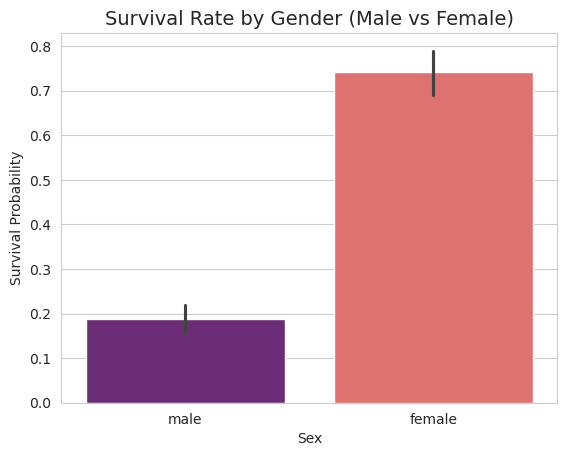

In [14]:
# creation of the chart bar
plt.figure(figure=(7,5))

sns.barplot(x="Sex", y="Survived", data=df, hue = "Sex", palette = "magma" , legend=False)

plt.title("Survival Rate by Gender (Male vs Female)", fontsize=14)
plt.ylabel("Survival Probability")
plt.show()

**Question 2: Did passenger class affect survival chances?**

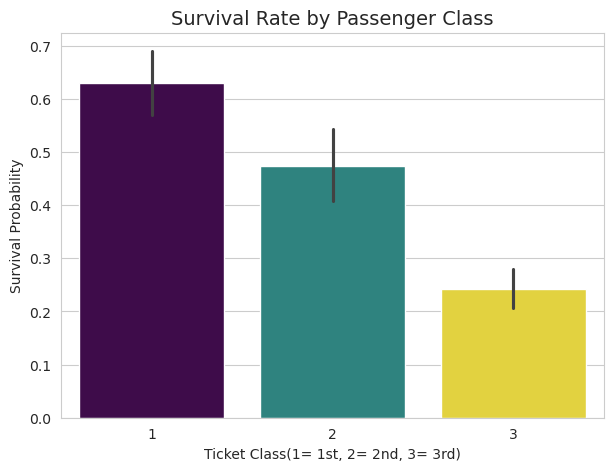

In [15]:
plt.figure(figsize=(7,5))

sns.barplot(x="Pclass", y="Survived", data=df, hue = "Pclass", palette="viridis", legend=False)

plt.title("Survival Rate by Passenger Class", fontsize=14)
plt.xlabel("Ticket Class(1= 1st, 2= 2nd, 3= 3rd)")
plt.ylabel("Survival Probability")
plt.show()

### 📊 Age Analysis

In this final phase of our analysis, we look at the age of the passengers. Age is a crucial factor because, during maritime disasters, "women and children first" is a standard protocol. We will first examine the general age distribution and then categorize passengers into groups to see how survival rates varied by age.

**1. Analyzing Age Distribution (Histogram) :** Before looking at survival, we need to understand the demographics of the ship. This histogram shows the frequency of different age groups among the passengers.

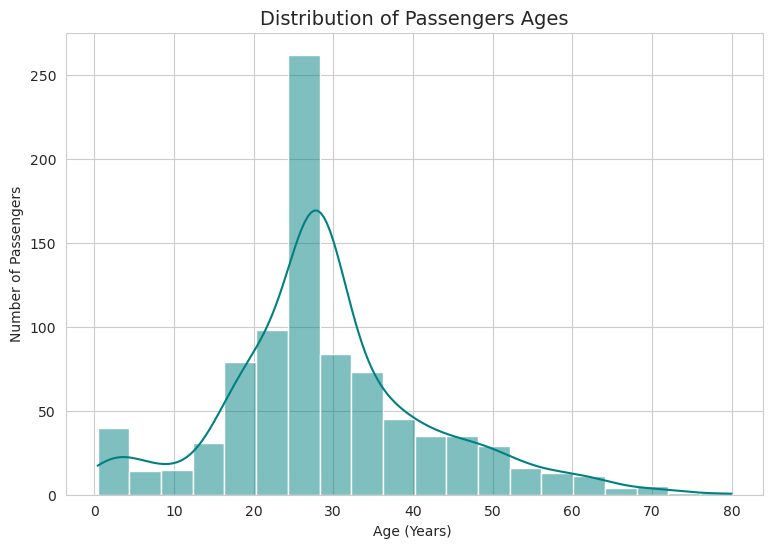

In [16]:
# Lets create a histogram to visvualise the distribution of the passenger's age
plt.figure(figsize=(9,6))

#sns.histplot gives a clear view of the age spread
#kde=True adds a kernel density estimate line to show the shape of the distribution
sns.histplot(df['Age'], bins=20, kde=True, color="teal")

plt.title("Distribution of Passengers Ages", fontsize=14)
plt.xlabel("Age (Years) ")
plt.ylabel("Number of Passengers")
plt.show()

We see a large peak around the 20–35 age range, indicating that the majority of passengers were young adults.

**2. Creating Age Groups & Survival Rates :** To answer the question "What was the survival rate by age group?", we create meaningful categories (bins). This allows us to compare children directly against adults and seniors.

In [26]:
# Define Age categories
# We use pd.cut to segment the 'Age' column into logical groups
bins = [0, 12, 18, 35, 60, 100]
labels = ['Child' , 'Teenager', 'Young Adult', 'Adult', 'Senior']

df['AgeGroup'] = pd.cut(df['Age'], bins= bins, labels=labels)

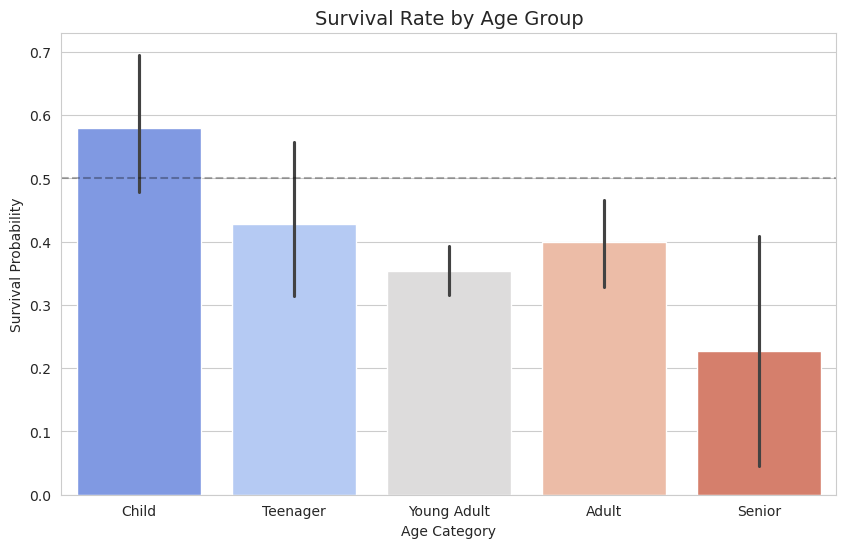

In [27]:
# Visualise Survival by Age Group
plt.figure(figsize=(10, 6))

sns.barplot(x="AgeGroup", y="Survived", data=df, hue="AgeGroup", palette="coolwarm", legend=False)

plt.title("Survival Rate by Age Group", fontsize=14)
#we are drawing a line at 0.5(50%) to easily see which groups had better than a coin-flip chance.
plt.axhline(0.5, color='black', linestyle='--', alpha=0.3)
plt.ylabel("Survival Probability")
plt.xlabel("Age Category")
plt.show()

In [28]:
# Lets now display exact percentages
age_survival_stats= df.groupby('AgeGroup', observed=True)['Survived'].mean()*100
print("Survival Percentage by Age Group:")
print(age_survival_stats.map('{:.2f}%'.format))

Survival Percentage by Age Group:
AgeGroup
Child          57.97%
Teenager       42.86%
Young Adult    35.33%
Adult          40.00%
Senior         22.73%
Name: Survived, dtype: object


As we clearly see from the bar chart, the **Child Group (0-12)** typically show a significantly higher survival rate than any other group, confirming that age was a major factor in who got onto the lifeboats.


We also can observe that **Seniors** and **Adults** often have the lowest survival rates, as priority was given to the young and the vulnerable

### 📌 Conclusion & Key Insights

In this project, we conducted a comprehensive Exploratory Data Analysis (EDA) on the Titanic dataset to uncover the factors that influenced passenger survival. Through data cleaning and visualization, we have reached the following conclusions:


**Gender Bias in Survival:** The analysis clearly shows that females had a much higher survival rate than males. This confirms the historical "women and children first" protocol followed during the disaster.


**Socio-Economic Impact:** Passenger class was a significant predictor of survival. Individuals in 1st Class had the highest survival probability, followed by 2nd Class, while those in 3rd Class had the lowest chances, suggesting that cabin location and social status played a role in lifeboat access.


**Age as a Factor:** The age distribution revealed that the majority of passengers were young adults. However, the survival rate by age group indicates that children were prioritized, showing a higher likelihood of survival compared to most adult categories.


**Data Integrity:** By handling missing values in the Age and Embarked columns, we ensured that our statistical insights were based on a complete and reliable dataset.



Overall, the data suggests that while the sinking of the Titanic was a tragic event, survival was not random; it was heavily influenced by gender, age, and social class. 

This project demonstrates the power of data visualization in turning raw data into meaningful historical and social insights.

---

**Organization:** MainCrafts Technology  
**Domain:** Data Science

---

### 👤 Author Information
* **Name:** Atharva Gangurde
* **Education:** B.Tech Biotechnology (ICAR-MPKV Agricultural University)
* **Contact:** blessed.atharvagangurde@gmail.com
* **LinkedIn:** [Atharva Gangurde](https://www.linkedin.com/in/atharva-gangurde-b6b9a8328/)
* **Date:** February 2026

---